# Aviation Risk Analysis

### Overview

As the company expands into the aviation industry, understanding the risks associated with different aircraft models is crucial. This project analyzes historical aviation incident data to identify low-risk aircraft for commercial and private use.

### Objective
- Determine which aircraft models have the lowest accident rates.
- Identify key risk factors such weather, flight phase, aircraft manufacturer.
- Provide three concrete business recommendations to guide aircraft purchase decisions.

### Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

In [34]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# load and preview the dataset
aviation_data_df = pd.read_csv(
    "data/AviationData.csv", encoding="latin-1", index_col=0, low_memory=False
)
aviation_data_df.head()

,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [37]:
# Display basic information about the dataset
aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50132 non-null  object 
 8   Airport.Name            52704 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87507 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

#### Determine the shape of the data set

In [38]:
# Display basic statistics about the dataset
aviation_data_df.shape

(88889, 30)

The dataset consists of 30 columns and 88889 rows

### Data Cleaning 
Here, the data is being cleaned, handling missing values and dropping irrelevant rows.

In [39]:
aviation_data_df.isnull().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

In [40]:
# clean the dataset
# convert Event.Date to datetime
aviation_data_df["Event.Date"] = pd.to_datetime(aviation_data_df["Event.Date"])

# convert Injury.Severity to numeric
numerical_columns = [
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured",
    "Number.of.Engines",
]
aviation_data_df[numerical_columns] = aviation_data_df[numerical_columns].apply(
    pd.to_numeric, errors="coerce"
)

aviation_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Accident.Number         88889 non-null  object        
 2   Event.Date              88889 non-null  datetime64[ns]
 3   Location                88837 non-null  object        
 4   Country                 88663 non-null  object        
 5   Latitude                34382 non-null  object        
 6   Longitude               34373 non-null  object        
 7   Airport.Code            50132 non-null  object        
 8   Airport.Name            52704 non-null  object        
 9   Injury.Severity         87889 non-null  object        
 10  Aircraft.damage         85695 non-null  object        
 11  Aircraft.Category       32287 non-null  object        
 12  Registration.Number     87507

In [ ]:
aviation_data_df.drop(columns=["Publication.Date", "Registration.Number"], inplace=True)

aviation_data_df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Location',
       'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

In [42]:
# Clean Model and Make columns
aviation_data_df["Model"] = aviation_data_df["Model"].str.strip().str.upper()
aviation_data_df["Make"] = aviation_data_df["Make"].str.strip().str.upper()

# This will ensure that there are no duplicated values in the Make column
aviation_data_df["Make"].value_counts()

Make
CESSNA           27149
PIPER            14870
BEECH             5372
BOEING            2745
BELL              2722
                 ...  
IZATT                1
MINCE                1
DANA A. MOORE        1
SLATER               1
SCOVIL               1
Name: count, Length: 7587, dtype: int64

#### Drop missing values 

In [43]:
cleaned_data_df = aviation_data_df.dropna(subset=["Model", "Make", "Location"])
cleaned_data_df.shape

(88725, 28)

After dropping missing values for make and model, we now have 88777 rows

In [44]:
# cleaned_data_df["Total.Fatal.Injuries"].isnull().sum()
cleaned_data_df["Purpose.of.flight"].fillna("Unknown", inplace=True)
cleaned_data_df["Purpose.of.flight"].unique()

/tmp/ipykernel_1878962/1668497785.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data_df["Purpose.of.flight"].fillna("Unknown", inplace=True)
/tmp/ipykernel_1878962/1668497785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_df["Purpose.of.flight"].fillna("Unknown", inplace=True)


array(['Personal', 'Unknown', 'Business', 'Instructional', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [45]:
# Clean Location column
cleaned_data_df["Location"] = cleaned_data_df["Location"].str.strip().str.upper()
cleaned_data_df["Weather.Condition"] = (
    cleaned_data_df["Weather.Condition"].str.strip().str.upper()
)
cleaned_data_df["Location"].value_counts()

/tmp/ipykernel_1878962/1816989649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_df['Location'] = cleaned_data_df['Location'].str.strip().str.upper()
/tmp/ipykernel_1878962/1816989649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_df["Weather.Condition"] = cleaned_data_df["Weather.Condition"].str.strip().str.upper()


Location
ANCHORAGE, AK      548
MIAMI, FL          275
HOUSTON, TX        271
ALBUQUERQUE, NM    265
CHICAGO, IL        255
                  ... 
DELHI,               1
IGARASSU,            1
KITCHENER,           1
LIBERIA,             1
TANNER, AL           1
Name: count, Length: 21945, dtype: int64

In [59]:
# Describe the dataset after cleaning
cleaned_data_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Event.Date,88725,1999-09-16 18:22:53.295012864,1948-10-24 00:00:00,1989-01-14 00:00:00,1998-07-17 00:00:00,2009-07-01 00:00:00,2022-12-29 00:00:00,NaN
Number.of.Engines,82731.0,1.146426,0.0,1.0,1.0,1.0,8.0,0.445944
Total.Fatal.Injuries,77353.0,0.645961,0.0,0.0,0.0,0.0,349.0,5.478909
Total.Serious.Injuries,76253.0,0.279805,0.0,0.0,0.0,0.0,161.0,1.544578
Total.Minor.Injuries,76830.0,0.357295,0.0,0.0,0.0,0.0,380.0,2.23722
Total.Uninjured,82839.0,5.314755,0.0,0.0,1.0,2.0,699.0,27.885265
Year,88725.0,1999.204046,1948.0,1989.0,1998.0,2009.0,2022.0,11.890908


- **Number of Engines:** Majority aircraft have 1 engine, as the mean is around 1.15, while the maximum number of engines is 8
- **Total Fatal Injuries:** Most incidents have 0 fatalities, however some incidents have very high fatality counts.
- **Total Serious Injuries:** Majority of the times there are 0 or few serious injuries.
- **Total Minor Injuries:** In most cases of accidents, majority of passengers suffer minor injuries with the maximum being 380

#### Data Visualization

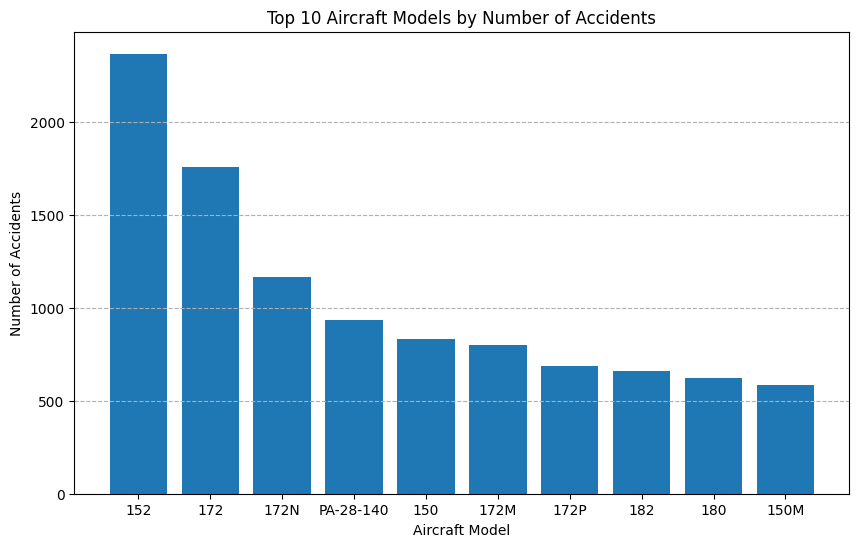

In [46]:
# Get the top 10 aircraft models with the most accidents
top_models = cleaned_data_df["Model"].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_models.index, top_models.values)
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Aircraft Models by Number of Accidents")
plt.grid(axis="y", linestyle="--", alpha=1)

# Show plot
plt.show()

In [62]:
cleaned_data_df["Country"].value_counts()

Country
United States               82186
Brazil                        369
Mexico                        357
Canada                        355
United Kingdom                344
                            ...  
Mauritania                      1
Pacific Ocean                   1
Obyan                           1
Guernsey                        1
Turks and Caicos Islands        1
Name: count, Length: 215, dtype: int64

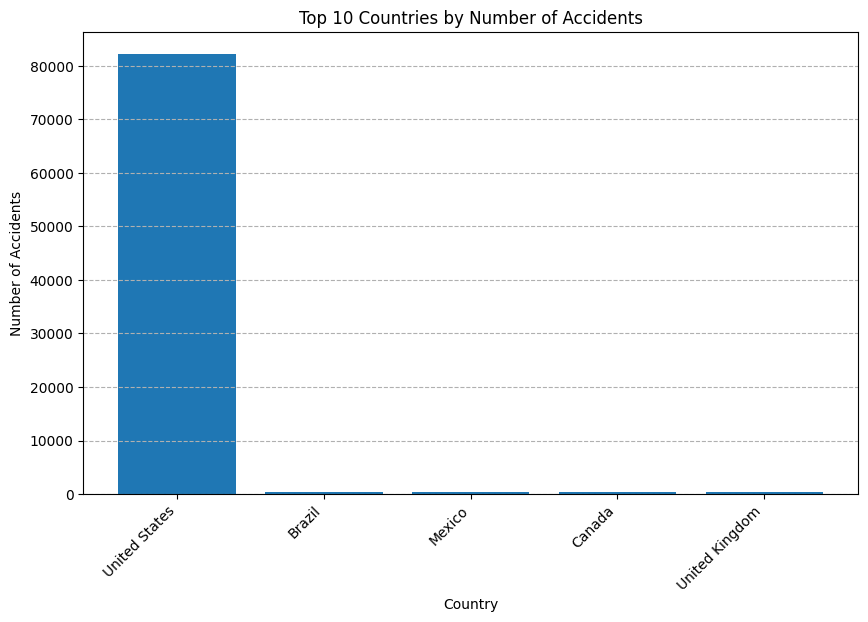

In [63]:
# Get the top 5 countries with the most accidents
top_models = cleaned_data_df["Country"].value_counts().head(5)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_models.index, top_models.values)
plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Countries by Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=1)

# Show plot
plt.show()

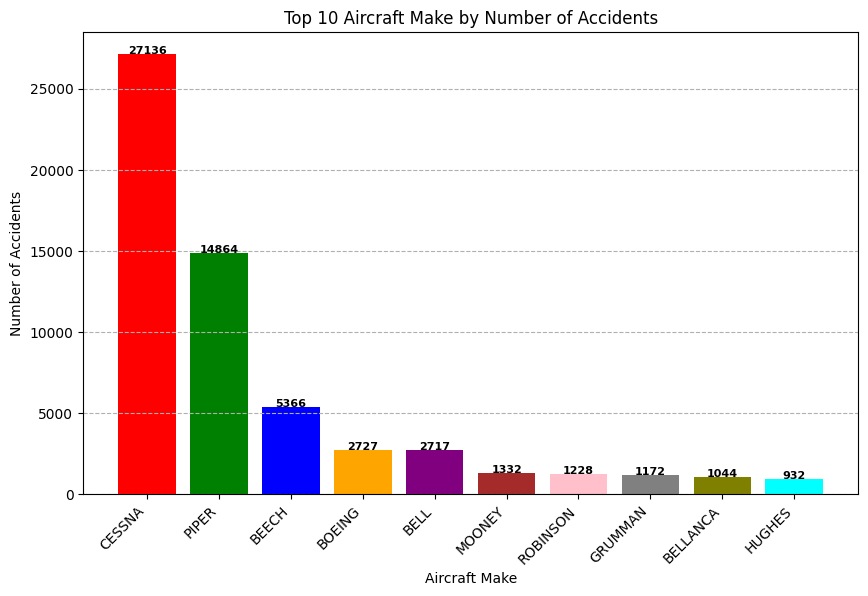

In [72]:
# Get the top 10 aircraft make with the most accidents
top_make = cleaned_data_df["Make"].value_counts().head(10)
colors = [
    "red",
    "green",
    "blue",
    "orange",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]
# Plot
plt.figure(figsize=(10, 6))

bars = plt.bar(top_make.index, top_make.values, color=colors)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        str(bar.get_height()),
        ha="center",
        fontsize=8,
        fontweight="bold",
    )
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Aircraft Make by Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=1)

# Show plot
plt.show()

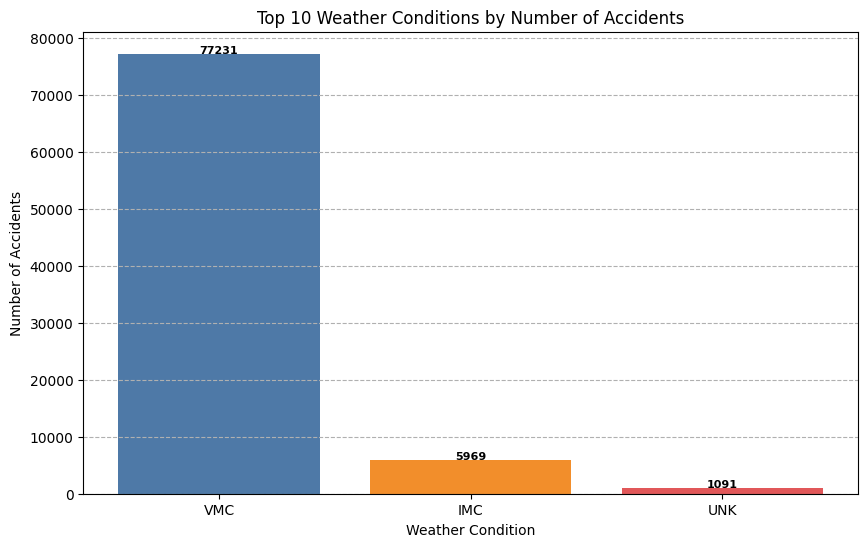

In [71]:
# Get the top 10 weather conditions with the most accidents
weather_counts = cleaned_data_df["Weather.Condition"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    weather_counts.index, weather_counts.values, color=["#4e79a7", "#f28e2b", "#e15759"]
)
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        str(bar.get_height()),
        ha="center",
        fontsize=8,
        fontweight="bold",
    )
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Weather Conditions by Number of Accidents")
plt.grid(axis="y", linestyle="--", alpha=1)

# Show plot
plt.show()

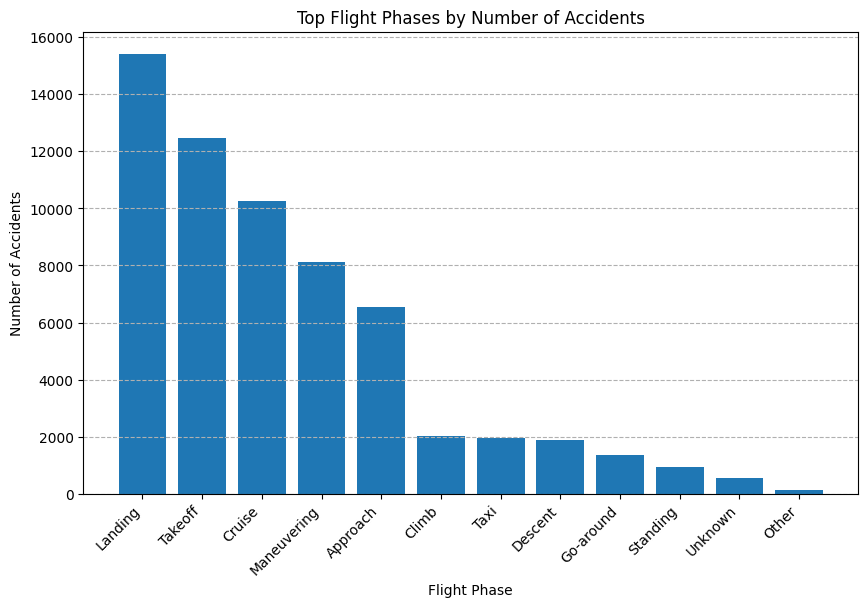

In [49]:
# Identify the phase of flight when most accidents occur
flight_phases = cleaned_data_df["Broad.phase.of.flight"].value_counts()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(flight_phases.index, flight_phases.values)
plt.xlabel("Flight Phase")
plt.ylabel("Number of Accidents")
plt.title("Top Flight Phases by Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=1)

# Show plot
plt.show()

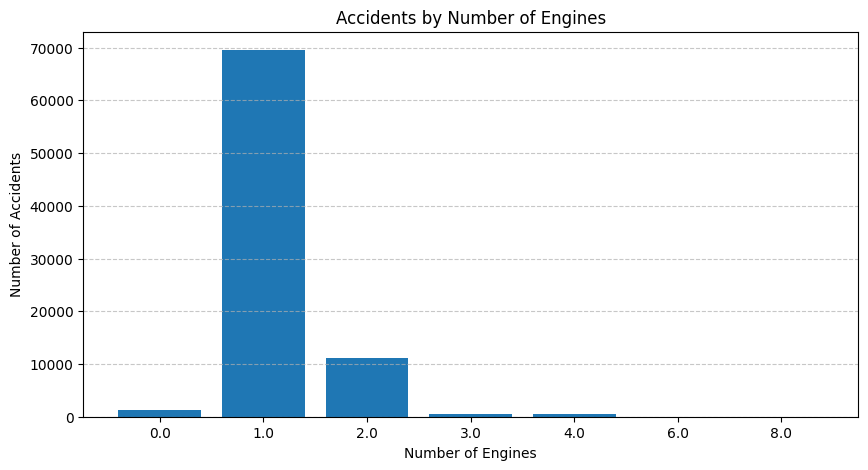

In [76]:
# Count accidents by the number of engines
engine_counts = cleaned_data_df["Number.of.Engines"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(engine_counts.index.astype(str), engine_counts.values)
plt.xlabel("Number of Engines")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Number of Engines")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

In [82]:
# Accidents by Number of Engines and Type of Engines
cleaned_data_df["Engine.Type"].value_counts()

Engine.Type
Reciprocating      69485
Turbo Shaft         3606
Turbo Prop          3389
Turbo Fan           2475
Unknown             2020
Turbo Jet            703
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

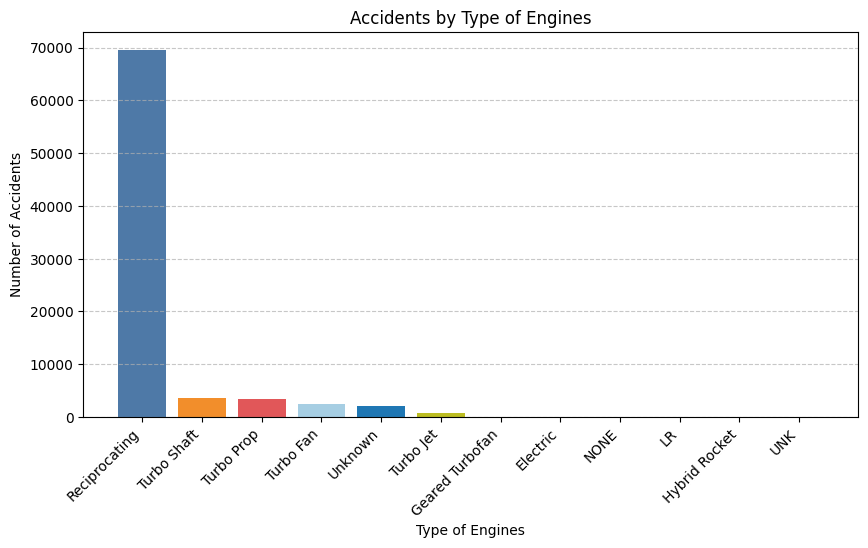

In [87]:
# Count accidents by the the type of engines
engine_counts = cleaned_data_df["Engine.Type"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(
    engine_counts.index.astype(str),
    engine_counts.values,
    color=["#4e79a7", "#f28e2b", "#e15759", "#a6cee3", "#1f77b4", "#bcbd22", "#17becf"],
)
plt.xlabel("Type of Engines")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Type of Engines")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

#### Analysis of flight accidents by the purpose of the flight
This will help the business identify which kind of flight purpose is of a high risk

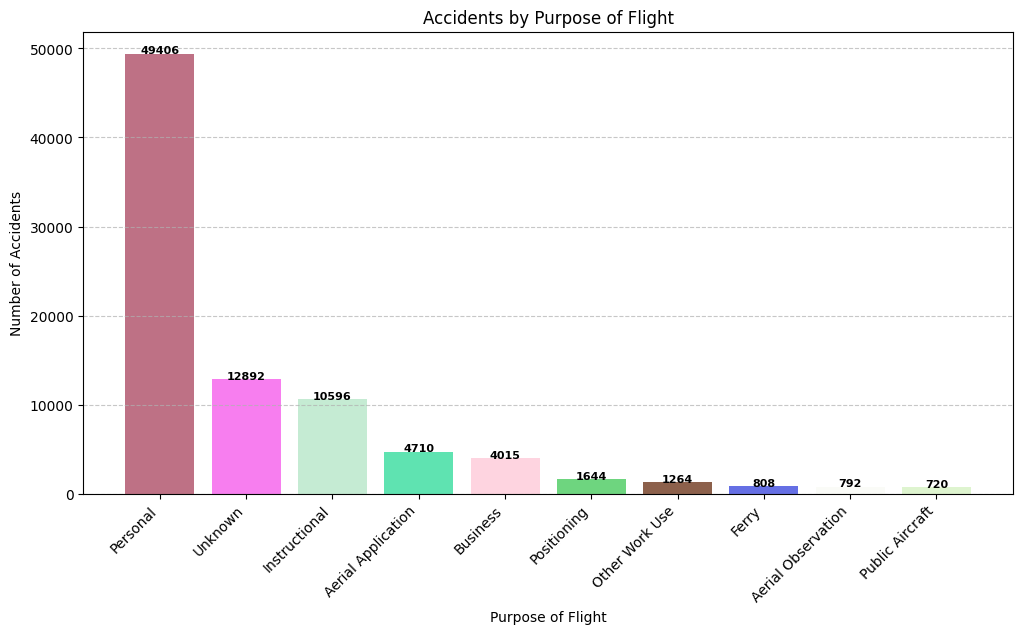

In [97]:
flight_purpose_counts = (
    cleaned_data_df["Purpose.of.flight"].value_counts().head(10)
)  # Top 10 purposes

random_colors = np.random.rand(len(flight_purpose_counts), 4)
# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(
    flight_purpose_counts.index, flight_purpose_counts.values, color=random_colors
)

# Add value labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        str(bar.get_height()),
        ha="center",
        fontsize=8,
        fontweight="bold",
    )

# Formatting
plt.xlabel("Purpose of Flight")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Purpose of Flight")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

#### Accidents by Aircraft Manufacturer Over Time
This shows the number of accidents of top 5 aircraft make over time

<Figure size 1000x600 with 0 Axes>

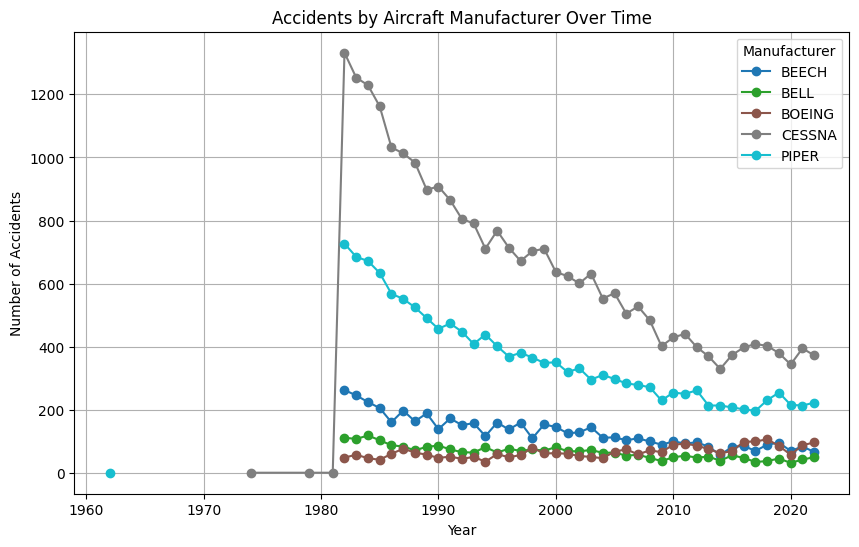

In [74]:
# Select top 5 manufacturers with most accidents
top_makes = cleaned_data_df["Make"].value_counts().head(5).index
df_top_makes = cleaned_data_df[cleaned_data_df["Make"].isin(top_makes)]

# Count accidents per year for each manufacturer
accidents_by_make = df_top_makes.groupby(["Year", "Make"]).size().unstack()

# Plot
plt.figure(figsize=(10, 6))
accidents_by_make.plot(
    kind="line", marker="o", linestyle="-", colormap="tab10", figsize=(10, 6)
)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Aircraft Manufacturer Over Time")
plt.legend(title="Manufacturer")
plt.grid(True)
plt.show()

#### Accidents by Flight Phase Over Time

<Figure size 1000x600 with 0 Axes>

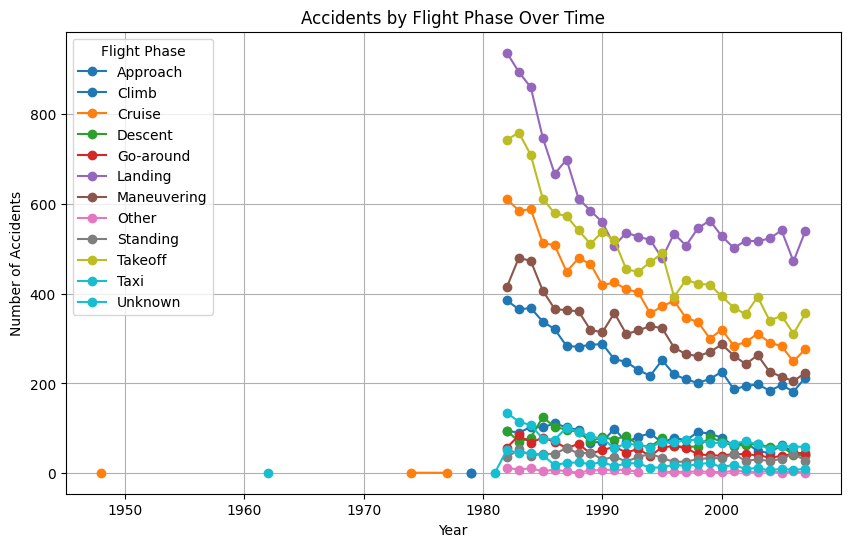

In [ ]:
accidents_by_phase = (
    cleaned_data_df.groupby(["Year", "Broad.phase.of.flight"]).size().unstack()
)

plt.figure(figsize=(10, 6))
accidents_by_phase.plot(
    kind="line", marker="o", linestyle="-", colormap="tab10", figsize=(10, 6)
)
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Flight Phase Over Time")
plt.legend(title="Flight Phase")
plt.grid(True)
plt.show()

From the analysis above, its clear that most accidents occur during landing and take off. Hence the business should keep keen attention and caution during landing and takeoff to prevent most of the accidents.

### Accidents by flight purpose over time

<Figure size 1200x600 with 0 Axes>

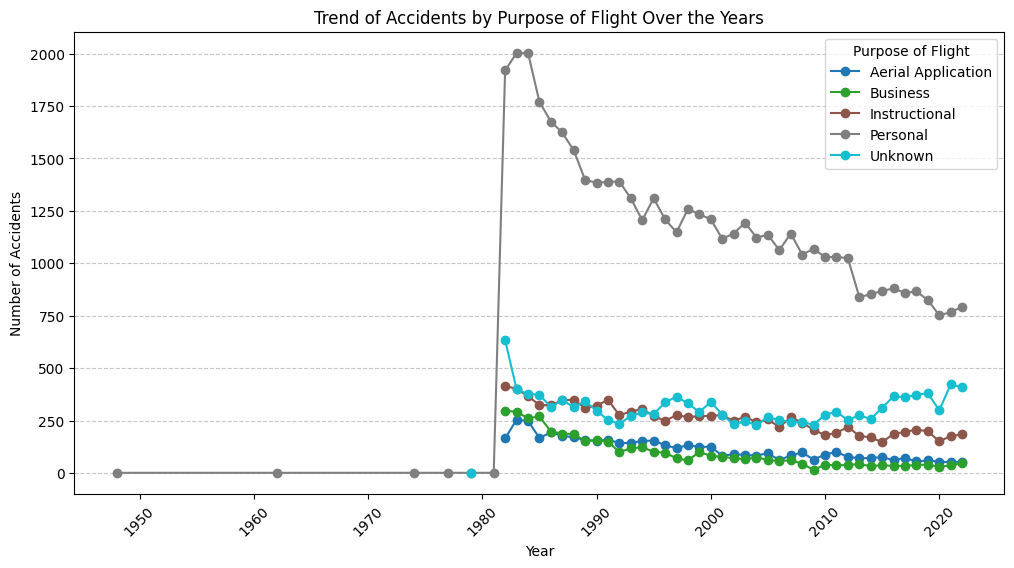

In [100]:
top_purposes = cleaned_data_df["Purpose.of.flight"].value_counts().head(5).index

# Filter dataset for only the top purposes
df_top_purposes = cleaned_data_df[cleaned_data_df["Purpose.of.flight"].isin(top_purposes)]

# Count occurrences of each purpose by year
purpose_trends = df_top_purposes.groupby(["Year", "Purpose.of.flight"]).size().unstack()

# Plot
plt.figure(figsize=(12, 6))
purpose_trends.plot(kind="line", marker="o", linestyle="-", figsize=(12, 6), colormap="tab10")

# Formatting
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Trend of Accidents by Purpose of Flight Over the Years")
plt.legend(title="Purpose of Flight")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(rotation=45)

# Show plot
plt.show()

In [55]:
# Export cleaned dataset to csv
cleaned_data_df.to_csv("cleaned_aviation_data.csv", index=False)